<a href="https://colab.research.google.com/github/Kihiko-Peter/KNN-Naive-Bayes/blob/main/K_NN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Defining the Question**

**(a) Specifying the question.**


This study tends to seek the survival rate of passengers on the titanic ship based on various variables.

**(b) Defining the metric for success**

The model will be considered successful when it attains a high percentage of accuracy

**(c) Understanding the context.**

Titanic, British luxury passenger liner that sank on April 15, 1912, en route to New York from Southampton, England, on its voyage.

The largest and most luxurious ship afloat, the Titanic had a double-bottomed hull divided into 16 watertight compartments. Because four of these could be flooded without endangering its buoyancy, it was considered unsinkable. Shortly before midnight on April 14, it collided with an iceberg southeast of Cape Race, Newfoundland; five compartments ruptured and the ship sank. Some 1,500 of its 2,200 passengers died.

**(d) Recording the experimental design.**


**(e) Data Relevance.**

i) Reading of the dataset.

ii) Data Understanding

iii) Data Relevance

iv) External Dataset Validation

v)Data Preperation

vi) Exploratory Data Analysis

vii) Modeling using the K- Nearest Neighbor

viii) Implementing the solution

ix) Challenging the solution

x) Follow up questions

**2. Reading the dataset.**

In [366]:
#Importing of the libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore' )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [367]:
#Loading of the dataset
train = pd.read_csv('train.csv', encoding='utf-8')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [368]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**3. Checking the dataset.**

In [369]:
#Checking the shapes of the data set

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [370]:
#Checking for the data types in each dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [371]:
#The test dataset
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [372]:
#Summary Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [373]:
#Summary Statistics
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**4. Tidying of the dataset**

a) Train data.

In [374]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [375]:
#Dropping the irrelevant columns
drop = ['Name','Ticket','Cabin']
train.drop(drop,axis= 1, inplace = True)

In [376]:
#Preview the data having dropped a few columns
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [377]:
#Checking for missing data
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [378]:
#Checking for the percentage of  missing data
missing_percentage = train.isna().sum()*100 / len(train)
missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

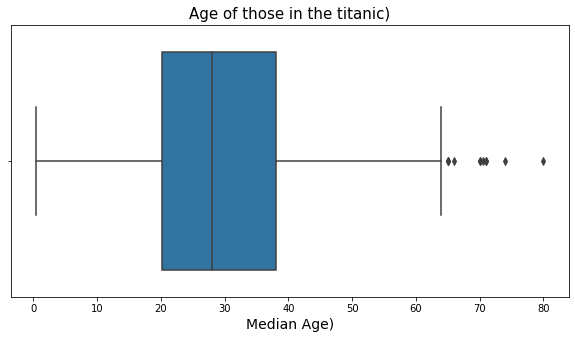

In [379]:
#Plotting the column age to visualize if it has outliers
fig = plt.figure(figsize=(10,5))
sns.boxplot(train.Age)
plt.title('Age of those in the titanic)', fontsize=15)
plt.xlabel('Median Age)', fontsize=14)
plt.show()

There are outliers in the variable age hence median is preffered to fill the null values over the mean.

In [380]:
#Dealing with missing values in the 'Age' column
train['Age'] = train['Age'].replace(np.nan,train.Age.median())


In [381]:
#Checking if the age column has missing values
train['Age'].isna().any()

False

In [382]:
#Dropping the missing values in the embarked column
train.dropna(axis=0,inplace= True)

There are only two rows with mising values which amounts to 0.22%, we choose to drop them since they will not have a large imact on the study.

In [383]:
#Checking if there are missing values
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [384]:
#Checking for duplicates in the dataset
train.duplicated().sum()

0

There were no duplicates in our dataset.

(b) Test dataset

In [385]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [386]:
#Dropping irrelevant columns
columns_drop = ['Name','Ticket','Cabin']
test.drop(columns_drop, axis= 1, inplace=True)

In [387]:
#Checking for null values
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [388]:
#Checking for the percentage of missing values
percentage =test.isna().sum()*100 / len(test)
percentage

PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Fare            0.239234
Embarked        0.000000
dtype: float64

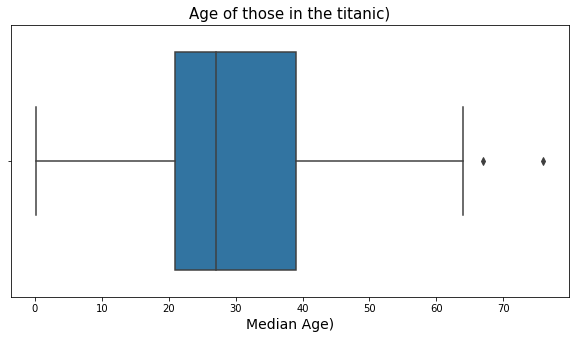

In [389]:
#Checking for outliers in the age column
fig = plt.figure(figsize=(10,5))
sns.boxplot(test.Age)
plt.title('Age of those in the titanic)', fontsize=15)
plt.xlabel('Median Age)', fontsize=14)
plt.show()

There are also outliers in the variable age hence median is preffered to fill the null values over the mean.

In [390]:
#Dealing with the missing values by filling them with the median
test['Age'] = test['Age'].replace(np.nan,test.Age.median())

In [391]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [392]:
#Dropping the missing values in the column 'Fare'
test.dropna(axis = 0, inplace= True)

There was only one row in the fare column that had missing values which amounted to 0.2% so it was dropped. This is because it did not have a large imapct on the dataset.

In [393]:
#Checking for missing values
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

**5. Exploratory Data Analysis.**


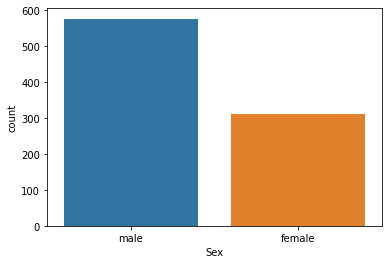

In [394]:
#Plotting a bar graph to visualize which gender survived the most
sns.countplot(train['Sex']);

There were more males in the ship than the females were.

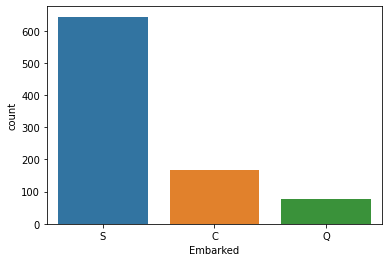

In [395]:
sns.countplot(train['Embarked']);

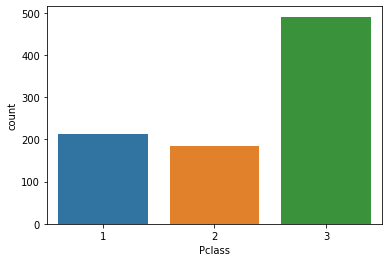

In [396]:
sns.countplot(train['Pclass']);

The Pclass 3 had the most number of passengers.

Checking for the correlation matrix.


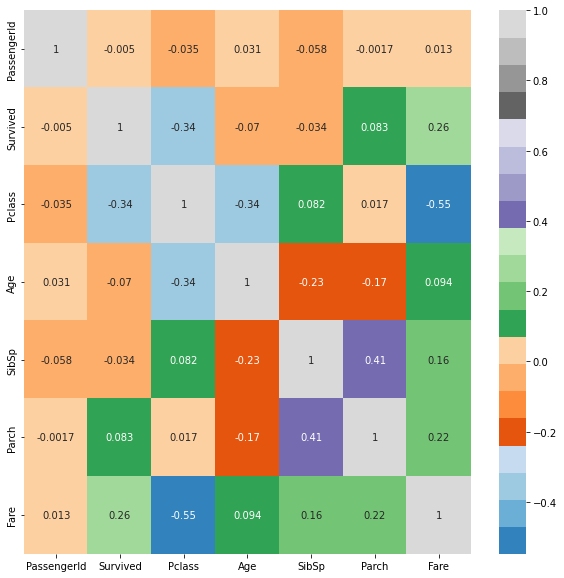

In [397]:
#Plotting a heatmap
plt.figure(figsize = (10,10))
sns.heatmap(train.corr(),annot = True,cmap="tab20c")
plt.show()

In [398]:
#
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending = False)

Survived       1.000000
Fare           0.255290
Parch          0.083151
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.069822
Pclass        -0.335549
Name: Survived, dtype: float64

There is correlation between Survived and the features of Fare and Pclass

6.** Implementing the solution.**

In [399]:
#Preprocessing the data using label encoder
le = LabelEncoder()
objects = [col for col in train.columns if train[col].dtype == 'object']
objects

['Sex', 'Embarked']

In [400]:
for col in objects:
  train[col]= le.fit_transform(train[col])

In [401]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [402]:
test_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [403]:
#Splitting of the dataset into X and y
X = train.drop('Survived', axis= 1).values
y = train['Survived'].values

In [404]:
#Crafting of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=15)

In [405]:
#Previewing of the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(711, 8)
(711,)
(178, 8)
(178,)


Choosing the accurate values of k

In [406]:
#choosing the correct values of k
range_of_k = range(1,26)
scores = []
for k in range_of_k:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train,y_train)
  y_predicted = model.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_predicted))

                


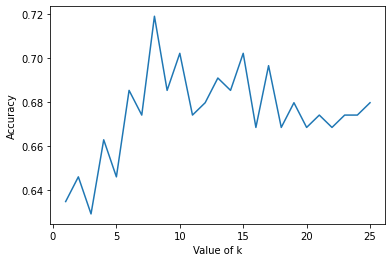

In [407]:
#Visualizing the find the best value of k
plt.plot(range_of_k,scores)
plt.ylabel('Accuracy')
plt.xlabel('Value of k');

In [408]:
#using the preferred value of k
model = KNeighborsClassifier(n_neighbors =8)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)


In [409]:
#Evaluation of the matrix

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       111
           1       0.84      0.31      0.46        67

    accuracy                           0.72       178
   macro avg       0.77      0.64      0.63       178
weighted avg       0.75      0.72      0.68       178

[[107   4]
 [ 46  21]]


A split of 80 - 20 gives 72 % accuracy

7. **Challenging the solution**.

Using different train & test splits with optimization

60 - 40 Split

In [410]:
#Splitting of the dataset into X and y
X = train.drop('Survived', axis= 1).values
y = train['Survived'].values

In [411]:
#Splitting of the dataset into X and y
#Crafting of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=15)

In [412]:
#choosing the correct values of k
range_of_k = range(1,26)
scores = []
for k in range_of_k:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train,y_train)
  y_predicted = model.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_predicted))


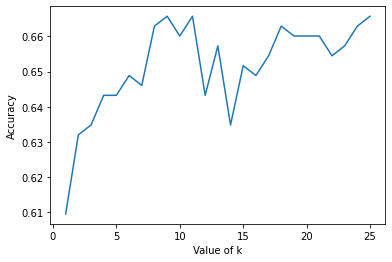

In [413]:
#Visualizing the find the best value of k
plt.plot(range_of_k,scores)
plt.ylabel('Accuracy')
plt.xlabel('Value of k');

In [414]:
#using the preferred value of k
model = KNeighborsClassifier(n_neighbors =18)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

In [415]:
#Evaluation of the matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77       210
           1       0.82      0.23      0.35       146

    accuracy                           0.66       356
   macro avg       0.73      0.60      0.56       356
weighted avg       0.72      0.66      0.60       356

[[203   7]
 [113  33]]


A split of 60 - 40 gives 69% accuracy

**70 - 30 Split (optimized)**

In [416]:
#Splitting of the dataset into X and y
X = train.drop('Survived', axis= 1).values
y = train['Survived'].values

In [417]:
#Crafting of the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=25)

In [418]:
#choosing the correct values of k
range_of_k = range(1,26)
scores = []
for k in range_of_k:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train,y_train)
  y_predicted = model.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,y_predicted))

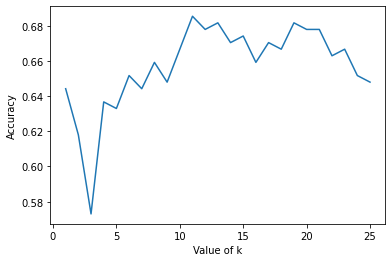

In [419]:
#Visualizing the find the best value of k
plt.plot(range_of_k,scores)
plt.ylabel('Accuracy')
plt.xlabel('Value of k');

In [420]:
#using the preferred value of k
model = KNeighborsClassifier(n_neighbors =11)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

In [421]:
#Evaluation of the matrix

print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78       164
           1       0.67      0.37      0.48       103

    accuracy                           0.69       267
   macro avg       0.68      0.63      0.63       267
weighted avg       0.68      0.69      0.66       267

[[145  19]
 [ 65  38]]


Conclusion

The best split was given by training 80% of the data and using the rest for training